# 🟡 **Leve3: Medium - Hard**

# 🧠 KNeighbors Classifier on Weather Dataset

In this notebook, we:
- Load and visualize the **Weather Dataset**
- Train Data by applying **KNeighbors Classifier** to improve performance
- Learn new concepts like label encoding. 
- Check results acroscore of model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
## to avoid warnings
import warnings

In [3]:
#import csv file
data2=pd.read_csv("weather.csv")

In [4]:
#check null cells
data2.isna().head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
len(data2)

366

In [6]:
## total None values
nulcount=data2.isnull().sum().sum()
nulcount

np.int64(47)

In [7]:
#drop null data 
data2=data2.dropna(axis=0)
data2=data2.reset_index(drop=True)

In [8]:
len(data2)

328

In [9]:
nulcount=data2.isnull().sum().sum()
nulcount

np.int64(0)

In [10]:
data2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
324,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
325,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
326,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [11]:
## Create DataFrame for Features
Features=data2.drop(["RainTomorrow"],axis=1)

In [12]:
Features

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
324,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
325,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
326,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


### Label Encoding  

Label Encoding is a preprocessing technique used to convert **categorical (textual) data** into **numerical labels**.  
- Each unique category is assigned an integer value.  
- Helps machine learning models understand categorical variables (since most algorithms only work with numbers).   

In [13]:
## using LabelEncoder 
l1=LabelEncoder()

In [14]:
Features["WindGustDir"]=l1.fit_transform(Features["WindGustDir"])
Features["WindDir9am"]=l1.fit_transform(Features["WindDir9am"])
Features["WindDir3pm"]=l1.fit_transform(Features["WindDir3pm"])
Features["RainToday"]=l1.fit_transform(Features["RainToday"])

In [15]:
Features

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,7.0,...,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
324,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,2.0,...,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
325,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,11.0,...,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
326,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,6.0,...,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [16]:
## Create a DataFrame for Targets
Target=pd.DataFrame()
Target["RainTomorrow"]=data2.RainTomorrow
Target.head()

,RainTomorrow
0,Yes
1,Yes
2,Yes
3,Yes
4,No


In [17]:
Target["RainTomorrow"]=l1.fit_transform(Target["RainTomorrow"])
Target.head()

,RainTomorrow
0,1
1,1
2,1
3,1
4,0


In [18]:
## create train and test data
Features_train,Features_test,Target_train,Target_test=train_test_split(Features,Target,test_size=0.1)

In [19]:
py=pd.DataFrame()

In [20]:
#creat model and fit
model2=KNeighborsClassifier(n_neighbors=6)
warnings.filterwarnings("ignore")
model2.fit(Features_train,Target_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
py["RainTomorrow"]=model2.predict(Features_test)
warnings.filterwarnings("ignore")
py.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [22]:
final_data=pd.concat([Features,Target],axis=1)

<Axes: >

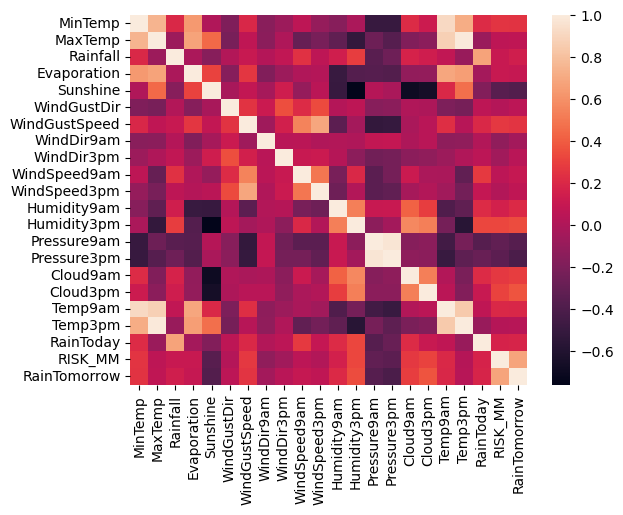

In [23]:
## Relation between all features and between targets too !!!
sns.heatmap(final_data.corr())

In [24]:
yc=confusion_matrix(Target_test,py)
yc

array([[26,  1],
       [ 4,  2]])

Text(50.722222222222214, 0.5, 'pridected')

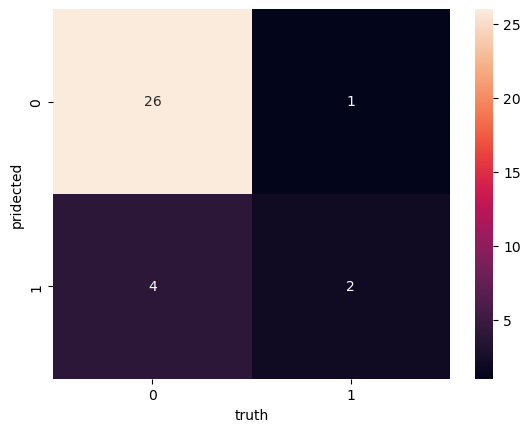

In [25]:
sns.heatmap(yc,annot=True)
plt.xlabel("truth")
plt.ylabel("pridected")